<a href="https://colab.research.google.com/github/jorobledo/curso_aprendizaje_automatico/blob/master/practico/clase_4/Perceptron_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 4: Perceptrón Múltiple

Queremos predecir el precio de casas utilizando un perceptrón simple.

[Imagen de perceptrón múltiple](https://miro.medium.com/max/1138/1*MF1q2Q3fbpYlXX8fZUiwpA.png)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor


Metodologia para entrenar algoritmo:

In [9]:
!pip install numpy

In [13]:
# Base de datos para google collab:
!wget https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/SaratogaHouses.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [10]:
# Base de datos para jupyter notebook
url = ("https://raw.githubusercontent.com/JoaquinAmatRodrigo/"
       "Estadistica-machine-learning-python/master/data/SaratogaHouses.csv")
datos = pd.read_csv(url, sep=",")

datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

In [11]:
datos

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


Precios de casas de acuerdo a diversas caracterizticas. 

## Análisis exploratorio

In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

todas las columnas tienen el tipo de dato correcto

In [ ]:
datos.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

Cuantos datos faltantes tiene la base de datos. Luego de ver esto hay que tomar alguna desicion, imputar u otra. 

No hay valores ausentes en la base de datos

Queremos predecir el precio de las casas. Con lo cual vamos a ver cómo es la distribución de la variable respuesta: 

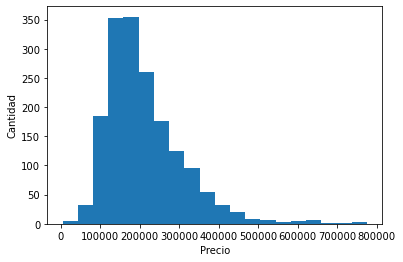

In [14]:
plt.hist(datos.precio, bins=20)
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.show()

Distribucion de la variable regresora. 

## División del conjunto de datos en entrenamiento y en prueba.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    datos.drop('precio', axis=1), #Tire variable precio 
    datos['precio'], # la variable dependiente es datos precio
    train_size = 0.8,
    random_state = 142,
    shuffle = True
)


In [16]:
X_train.describe()

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.505304,27.247467,34525.434153,1760.500000,55.553546,3.158466,0.601302,1.909551,7.057164
std,0.684362,28.802951,34787.245248,620.660401,10.371085,0.802916,0.558858,0.654563,2.307700
min,0.000000,0.000000,200.000000,672.000000,20.000000,1.000000,0.000000,0.000000,3.000000
25%,0.170000,13.000000,15100.000000,1304.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,0.370000,19.000000,25000.000000,1626.000000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,0.540000,33.000000,41025.000000,2160.250000,64.000000,4.000000,1.000000,2.500000,8.000000
max,8.970000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [ ]:
X_test.describe()

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.479884,30.586705,34684.017341,1732.910405,55.624277,3.138728,0.604046,1.862717,6.979769
std,0.753866,30.680206,35991.436683,617.433351,10.197066,0.873675,0.545746,0.672932,2.353449
min,0.010000,0.000000,400.000000,616.000000,20.000000,1.000000,0.000000,1.000000,2.000000
25%,0.160000,13.000000,15325.000000,1290.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,0.360000,19.000000,25100.000000,1661.000000,57.000000,3.000000,1.000000,1.500000,7.000000
75%,0.567500,36.000000,37600.000000,2124.750000,64.000000,4.000000,1.000000,2.500000,9.000000
max,12.200000,169.000000,255000.000000,4856.000000,77.000000,7.000000,2.000000,4.000000,12.000000


Vemos que entrenamiento y testeo sean maso menos parecidos. 

## Preprocesamiento 
Los modelos de redes neuronales en general necesitan de preprocesamiento. Los dos más comunes son la binarización de las variables categóricas y la estandarización de las variables continuas. 

In [22]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
numeric_cols

['metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'chimenea',
 'banyos',
 'habitaciones']

In [23]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
cat_cols

['calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

Separa en variables continuas y categoricas. 

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

Hace la transformacion de las variables planteadas anteriormente. 
Lo hace a traves de un pipeline. 
Con el pipeline defino la secuencia de acciones que voy a aplicar a los datos.

In [26]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [27]:
X_train_prep

array([[-0.32933641,  0.13033008, -0.32568068, ...,  0.        ,
         0.        ,  1.        ],
       [-0.50474557, -0.39063841, -0.54135499, ...,  0.        ,
         1.        ,  0.        ],
       [-0.27086669, -0.94633814,  0.55714614, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.16854468,  0.37344871, -0.14163861, ...,  0.        ,
         1.        ,  0.        ],
       [-0.49012814,  0.40817995,  0.61178363, ...,  0.        ,
         1.        ,  0.        ],
       [-0.06622267,  0.30398625, -0.20490307, ...,  0.        ,
         1.        ,  0.        ]])

transformamos la salida en dataframe y añadimos el nombre de las columnas

Volvemos a convertir en un data frame y le pongo nomrbes de vuelta.

In [29]:
encoded_cat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = pd.DataFrame(X_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   chimenea                     1382 non-null   float64
 7   banyos                       1382 non-null   float64
 8   habitaciones                 1382 non-null   float64
 9   calefaccion_electric         1382 non-null   float64
 10  calefaccion_hot air          1382 non-null   float64
 11  calefaccion_hot water/steam  1382 non-null   float64
 12  consumo_calefacion_electric  1382 non-null   float64
 13  consumo_calefacion

In [ ]:
datos_train_prep

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion_electric,calefaccion_hot air,calefaccion_hot water/steam,consumo_calefacion_electric,consumo_calefacion_gas,consumo_calefacion_oil,desague_none,desague_public/commercial,desague_septic,vistas_lago_No,vistas_lago_Yes,nueva_construccion_No,nueva_construccion_Yes,aire_acondicionado_No,aire_acondicionado_Yes
0,-0.329336,0.130330,-0.325681,0.240960,0.814718,-0.197434,0.713672,-0.625913,-0.024780,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.504746,-0.390638,-0.541355,-1.367587,-0.342764,-1.443345,0.713672,-0.625913,-0.024780,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.270867,-0.946338,0.557146,0.593937,0.814718,1.048476,0.713672,0.902376,0.842198,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.664649,0.616567,-0.742651,-0.593937,0.621805,-0.197434,-1.076337,-1.390057,-0.891757,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.036988,-0.008595,-0.081250,0.179712,-0.342764,1.048476,0.713672,0.902376,0.408709,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,0.606179,-0.564295,-0.918066,-0.274807,-1.886073,-1.443345,0.713672,0.138232,-0.458269,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1378,-0.270867,-0.599026,-0.685138,-0.455325,-0.149850,-0.197434,0.713672,0.902376,-0.891757,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1379,-0.168545,0.373449,-0.141639,0.053994,0.814718,1.048476,0.713672,-0.625913,1.275687,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1380,-0.490128,0.408180,0.611784,-1.161280,0.621805,2.294386,-1.076337,-0.625913,-0.458269,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [31]:
modelo = MLPRegressor(activation='relu')

In [32]:
param_distributions = {
    'hidden_layer_sizes': [(10), (20), (10, 10)],
    'alpha': np.logspace(-3, 3, 10),
    'learning_rate_init': [0.001, 0.01],
}

Hacemos cross validation de muchos parametros.

In [38]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing

grid = RandomizedSearchCV(
        estimator  = modelo,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error', # Este es el criterio que le ponemos
        n_jobs     = multiprocessing.cpu_count() - 1, # Que use todos los cpu -1, para interaccion grafica.
        cv         = 2, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

In [39]:
grid.fit(X = datos_train_prep, y = y_train)

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RandomizedSearchCV(cv=2, estimator=MLPRegressor(), n_iter=50, n_jobs=11,
                   param_distributions={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'hidden_layer_sizes': [10, 20,
                                                               (10, 10)],
                                        'learning_rate_init': [0.001, 0.01]},
                   random_state=123, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [40]:
resultados = pd.DataFrame(grid.cv_results_)

In [41]:
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.373987,0.001011,0.002494,4.981756e-04,0.001,10,0.464159,"{'learning_rate_init': 0.001, 'hidden_layer_si...",-5.810113e+10,-5.129553e+10,-5.469833e+10,3.402800e+09,47,-5.129160e+10,-5.810452e+10,-5.469806e+10,3.406462e+09
1,0.388958,0.025929,0.003990,9.965897e-04,0.01,20,10.0,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.050882e+10,-4.368380e+10,-4.709631e+10,3.412509e+09,13,-4.466522e+10,-4.925591e+10,-4.696057e+10,2.295345e+09
2,0.426858,0.007979,0.003990,9.977818e-04,0.01,20,0.021544,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.104633e+10,-4.560652e+10,-4.832642e+10,2.719907e+09,16,-4.513794e+10,-5.149435e+10,-4.831615e+10,3.178206e+09
3,0.381975,0.003991,0.003489,5.000830e-04,0.01,10,2.154435,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.396796e+10,-4.812115e+10,-5.104455e+10,2.923406e+09,21,-4.766598e+10,-5.441374e+10,-5.103986e+10,3.373881e+09
4,0.329617,0.048374,0.003491,4.982948e-04,0.01,10,46.415888,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.450533e+10,-4.811500e+10,-5.131016e+10,3.195168e+09,23,-4.814787e+10,-5.440531e+10,-5.127659e+10,3.128721e+09
5,0.549534,0.005988,0.004985,2.000332e-03,0.001,"(10, 10)",215.443469,"{'learning_rate_init': 0.001, 'hidden_layer_si...",-5.774240e+10,-5.055663e+10,-5.414951e+10,3.592882e+09,33,-5.097440e+10,-5.725955e+10,-5.411698e+10,3.142578e+09
6,0.407910,0.001994,0.005486,1.494408e-03,0.001,10,0.1,"{'learning_rate_init': 0.001, 'hidden_layer_si...",-5.811059e+10,-5.128948e+10,-5.470003e+10,3.410555e+09,48,-5.130023e+10,-5.809871e+10,-5.469947e+10,3.399242e+09
7,0.542266,0.001480,0.003027,7.271767e-06,0.001,"(10, 10)",10.0,"{'learning_rate_init': 0.001, 'hidden_layer_si...",-5.755056e+10,-5.044471e+10,-5.399764e+10,3.552922e+09,31,-5.079454e+10,-5.712074e+10,-5.395764e+10,3.163101e+09
8,0.389460,0.017451,0.004984,1.996398e-03,0.01,10,1000.0,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.510033e+10,-4.658953e+10,-5.084493e+10,4.255402e+09,19,-4.866173e+10,-5.263478e+10,-5.064826e+10,1.986521e+09
9,0.388965,0.015962,0.003486,5.028248e-04,0.01,10,0.021544,"{'learning_rate_init': 0.01, 'hidden_layer_siz...",-5.449002e+10,-4.811197e+10,-5.130099e+10,3.189026e+09,22,-4.814135e+10,-5.440834e+10,-5.127485e+10,3.133499e+09


In [43]:
modelo_final = grid.best_estimator_

Ajusta el modelo con mejor combinacion de parametros

In [44]:
modelo_final

MLPRegressor(alpha=215.44346900318823, hidden_layer_sizes=(10, 10),
             learning_rate_init=0.01)

In [45]:
datos_test_prep = pd.DataFrame(X_test_prep, columns=labels)
predicciones = modelo_final.predict(X = datos_test_prep)

In [46]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

57158.96626433938

In [47]:
predicciones[0]

148711.78966341887

In [48]:
y_test.iloc[1]

117900

In [49]:
y_test.shape

(346,)

In [50]:
i=20
y_test.iloc[i]-predicciones[i]

17864.437602555845

Cuanto le erra para cada prediccion, en un caso particular.

In [51]:
modelo_final.get_params()

{'activation': 'relu',
 'alpha': 215.44346900318823,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Permite obtener parametros y bueno si estamos de acuerdo lo guardamos y ya tenemos archivo con los pesos entrenados y puedo correrlo en cualquier lado para predecir. 